## Final Project Submission

Please fill out:
* Student name: Eva Moisasi
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Overview
This analysis explore what type of films are doing well in the market, and provides the findings to Microsoft's new movie studio executives to help in their data driven decision making as they venture into the movie industry.For this project, i have used exploratory data analysis to generate insights from the IMDB movies dataset.


# Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

# Data Understanding

In [1081]:
# Your code here - remember to use markdown cells for comments as well!
#import all the libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1082]:
#load the data
bom_df= pd.read_csv('zippedData/bom.movie_gross.csv.gz')
imdb_basics = pd.read_csv("zippedData/imdb.title.basics.csv.gz")
imdb_ratings= pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

Display the first and last 3 rows of all our data.

In [1083]:
bom_df.head(3)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


In [1084]:
bom_df.tail(3)

,title,studio,domestic_gross,foreign_gross,year
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [1085]:
imdb_basics.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [1086]:
imdb_basics.tail(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [1087]:
imdb_ratings.head(3)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20


In [1088]:
imdb_ratings.tail(3)

,tconst,averagerating,numvotes
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


# Merge our DataFrames to get a better understanding of the data.

In [1089]:
#merge the dataframes to get a better understanding of our data for analysis
merged_df = pd.merge(imdb_basics,imdb_ratings, on = 'tconst')
merged_df.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517


In [1090]:
final_df = pd.merge(merged_df, bom_df, suffixes = ['_l', '_r'],left_on='original_title',right_on = 'title')

In [1091]:
final_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,On the Road,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,On the Road,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013


In [1092]:
final_df.tail()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
2442,tt8097306,Nobody's Fool,Nobody's Fool,2018,110.0,"Comedy,Drama,Romance",4.6,3618,Nobody's Fool,Par.,31700000.0,1800000,2018
2443,tt8108198,Andhadhun,Andhadhun,2018,139.0,"Crime,Thriller",8.5,43409,Andhadhun,Eros,1200000.0,NaN,2018
2444,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,5.4,673,Helicopter Eela,Eros,72000.0,NaN,2018
2445,tt8549902,Oolong Courtyard: KungFu School,Oolong Courtyard,2018,103.0,Comedy,4.6,61,Oolong Courtyard,CL,37700.0,NaN,2018
2446,tt9151704,Burn the Stage: The Movie,Burn the Stage: The Movie,2018,84.0,"Documentary,Music",8.8,2067,Burn the Stage: The Movie,Trafalgar,4200000.0,16100000,2018


In [1093]:
#get the general info of our data set
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2447 entries, 0 to 2446
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           2447 non-null   object 
 1   primary_title    2447 non-null   object 
 2   original_title   2447 non-null   object 
 3   start_year       2447 non-null   int64  
 4   runtime_minutes  2402 non-null   float64
 5   genres           2443 non-null   object 
 6   averagerating    2447 non-null   float64
 7   numvotes         2447 non-null   int64  
 8   title            2447 non-null   object 
 9   studio           2444 non-null   object 
 10  domestic_gross   2429 non-null   float64
 11  foreign_gross    1573 non-null   object 
 12  year             2447 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 267.6+ KB


In [1094]:
final_df.shape
print("Number of Rows", final_df.shape[0])
print("Number of Columns",final_df.shape[1])

Number of Rows 2447
Number of Columns 13


In [1095]:
#check for duplicates
final_df.duplicated().sum()

0

# Data Cleaning

In [1096]:
#check for missing values in each column of our dataframe.
final_df.isnull().sum()

tconst               0
primary_title        0
original_title       0
start_year           0
runtime_minutes     45
genres               4
averagerating        0
numvotes             0
title                0
studio               3
domestic_gross      18
foreign_gross      874
year                 0
dtype: int64

In [1097]:
#check the percentage of missing values in the data set
per_missing = final_df.isnull().sum()*100/len(final_df)
per_missing

tconst              0.000000
primary_title       0.000000
original_title      0.000000
start_year          0.000000
runtime_minutes     1.838987
genres              0.163465
averagerating       0.000000
numvotes            0.000000
title               0.000000
studio              0.122599
domestic_gross      0.735595
foreign_gross      35.717205
year                0.000000
dtype: float64

In [1098]:
#drop the foreign_gross since 35% of our data is missing
final_df= final_df.drop('foreign_gross', axis= 1) 

In [1099]:
final_df.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'title',
       'studio', 'domestic_gross', 'year'],
      dtype='object')

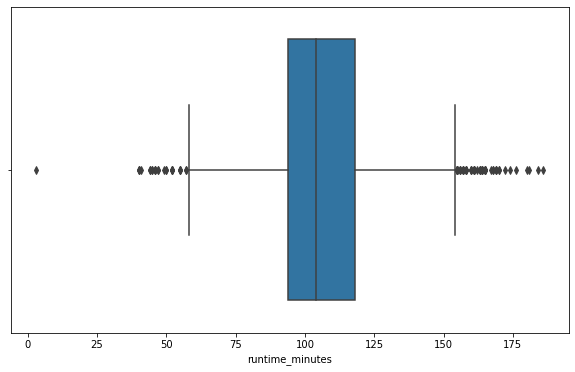

In [1100]:
#cheking for outliers in our runtime_minutes column before dealing with the missing values in this column
fig, ax = plt.subplots(figsize =(10,6))
sns.boxplot(x=final_df.runtime_minutes)
plt.show()

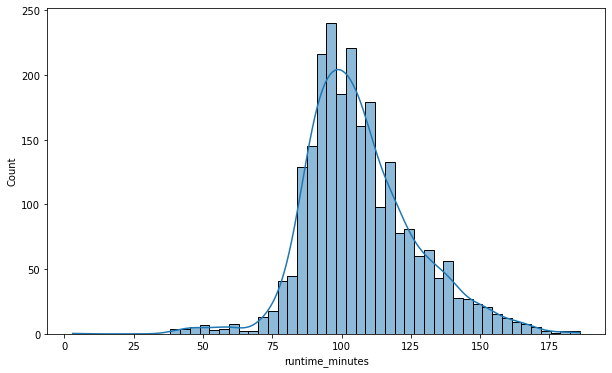

In [1101]:
fig, ax = plt.subplots(figsize =(10,6))
sns.histplot(final_df.runtime_minutes, kde=True)
plt.show()

In [1102]:
#Replace the missing values in runtime_minutes with the mean of the column
final_df['runtime_minutes']=final_df.runtime_minutes.fillna(final_df.runtime_minutes.mean())

In [1103]:
final_df.isna().sum()

tconst              0
primary_title       0
original_title      0
start_year          0
runtime_minutes     0
genres              4
averagerating       0
numvotes            0
title               0
studio              3
domestic_gross     18
year                0
dtype: int64

In [1104]:
#Drop the rest of the missing values from our data set
final_df.dropna(axis=0, inplace = True)


In [1105]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2424 entries, 0 to 2446
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           2424 non-null   object 
 1   primary_title    2424 non-null   object 
 2   original_title   2424 non-null   object 
 3   start_year       2424 non-null   int64  
 4   runtime_minutes  2424 non-null   float64
 5   genres           2424 non-null   object 
 6   averagerating    2424 non-null   float64
 7   numvotes         2424 non-null   int64  
 8   title            2424 non-null   object 
 9   studio           2424 non-null   object 
 10  domestic_gross   2424 non-null   float64
 11  year             2424 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 246.2+ KB


In [1106]:
#check for overall statistics of our dataframe.
final_df.describe()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,year
count,2424.000000,2424.000000,2424.000000,2.424000e+03,2.424000e+03,2424.000000
mean,2013.783003,106.889792,6.408581,7.334540e+04,3.611537e+07,2014.012376
std,2.492569,19.847927,1.042490,1.350694e+05,6.957061e+07,2.462398
min,2010.000000,3.000000,1.600000,5.000000e+00,1.000000e+02,2010.000000
25%,2012.000000,94.000000,5.800000,3.919000e+03,3.020000e+05,2012.000000
50%,2014.000000,104.000000,6.500000,2.121800e+04,5.050000e+06,2014.000000
75%,2016.000000,118.000000,7.100000,8.138900e+04,4.292500e+07,2016.000000
max,2019.000000,186.000000,9.200000,1.841066e+06,7.001000e+08,2018.000000


From our overall statistics we can see that our data set contains movies from the year 2010 to the year 2019.
We can also see that the heighest averagerating is 9.2 while the lowest is 1.0.

In [1107]:
final_df.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'title',
       'studio', 'domestic_gross', 'year'],
      dtype='object')

# Group the averagerating column into(Excellent, Good, Average and Below average)

In [1108]:
#define a function that groups the averagerating column
def rating(averagerating):
    if averagerating >= 8:
        return "Excellent"
    elif averagerating >= 6:
        return "Good"
    elif averagerating >= 4:
        return "Average"
    else:
        return "Below Average"

In [1109]:
#create a new column for our grouped data
final_df['Rating']=final_df['averagerating'].apply(rating)

In [1110]:
final_df.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'title',
       'studio', 'domestic_gross', 'year', 'Rating'],
      dtype='object')

In [1111]:
final_df.genres

0            Action,Crime,Drama
1       Adventure,Drama,Romance
2                         Drama
3                         Drama
4        Adventure,Comedy,Drama
                 ...           
2442       Comedy,Drama,Romance
2443             Crime,Thriller
2444                      Drama
2445                     Comedy
2446          Documentary,Music
Name: genres, Length: 2424, dtype: object

In [1112]:
#finding the unique values in the genres column
#creat one list for all the items in genres
list1=[]
for item in final_df['genres']:
    list1.append(item.split(','))
list1
list2=[]
for item in list1:
    for item1 in item:
        list2.append(item1)
list2
unique_genre=[]
for item in list2:
    if item not in unique_genre:
        unique_genre.append(item)
print(unique_genre)
len(unique_genre)

['Action', 'Crime', 'Drama', 'Adventure', 'Romance', 'Comedy', 'Sci-Fi', 'Family', 'Animation', 'Thriller', 'Mystery', 'Biography', 'History', 'Horror', 'Documentary', 'News', 'Fantasy', 'Sport', 'Music', 'War', 'Western', 'Musical']


22

In [1113]:
movie_df= final_df.copy()
final_df['genres']= final_df['genres'].str.split(',')
movie_df=final_df.explode('genres')

In [1114]:
movie_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,year,Rating
0,tt0315642,Wazir,Wazir,2016,103.0,Action,7.1,15378,Wazir,Relbig.,1100000.0,2016,Good
0,tt0315642,Wazir,Wazir,2016,103.0,Crime,7.1,15378,Wazir,Relbig.,1100000.0,2016,Good
0,tt0315642,Wazir,Wazir,2016,103.0,Drama,7.1,15378,Wazir,Relbig.,1100000.0,2016,Good
1,tt0337692,On the Road,On the Road,2012,124.0,Adventure,6.1,37886,On the Road,IFC,744000.0,2012,Good
1,tt0337692,On the Road,On the Road,2012,124.0,Drama,6.1,37886,On the Road,IFC,744000.0,2012,Good


# Data Visualization

# which Genre has the higest rating

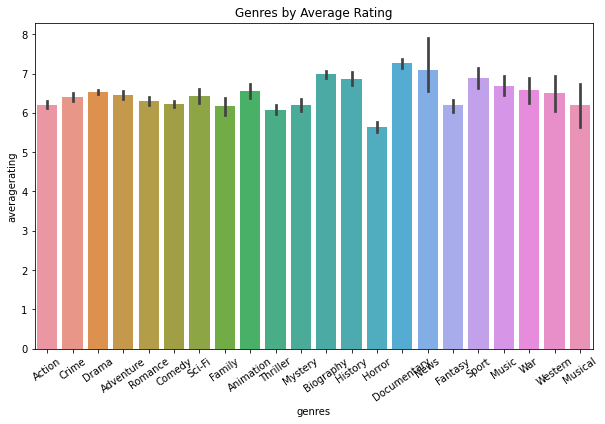

In [1118]:
movie_df.groupby('genres')['averagerating'].mean().sort_values(ascending = False)
plt.figure(figsize=(10,6))
sns.barplot(x='genres', y= "averagerating", data=movie_df)
plt.xticks(rotation=35)
plt.title('Genres by Average Rating')
plt.show()

We can see that horror has the higest average rating

# Doese Ratings affect Revenue?

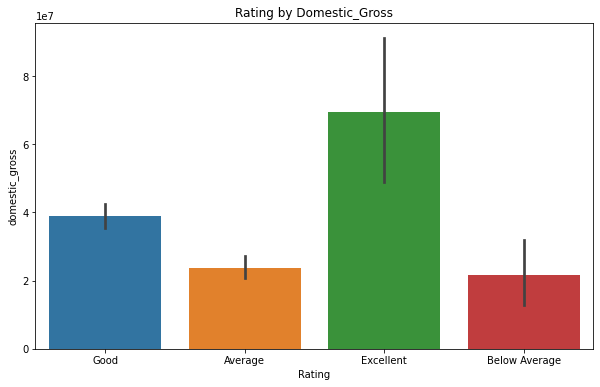

In [1040]:
final_df.groupby('Rating')['domestic_gross'].mean().sort_values(ascending = False)
plt.figure(figsize=(10,6))
sns.barplot(x='Rating', y= "domestic_gross", data=final_df)
plt.title('Rating by Domestic_Gross')
plt.show()

Text(0.5, 1.0, 'Rating by Domestic_Gross')

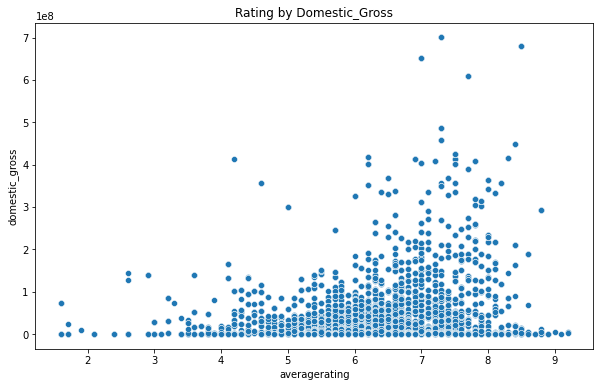

In [1041]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='averagerating',y='domestic_gross',data=movie_df)
plt.title('Rating by Domestic_Gross')

Yes Ratings affects Revenue. From our visualization above we can see that the AverageRating affects the domestic_gross of the movies.
The higher the AverageRating the higher the domestic_gross.

# Which Genres have the Higest Domestic Gross?

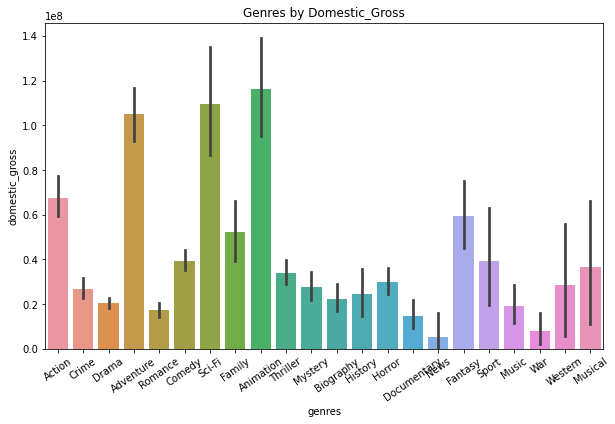

In [1042]:
movie_df.groupby('genres')['domestic_gross'].mean().sort_values(ascending = False)
plt.figure(figsize=(10,6))
sns.barplot(x='genres', y= "domestic_gross", data=movie_df)
plt.xticks(rotation=35)
plt.title('Genres by Domestic_Gross')
plt.show()

The genre with the higest domestic gross is Animation.

# Which Genre has the higest number of votes?

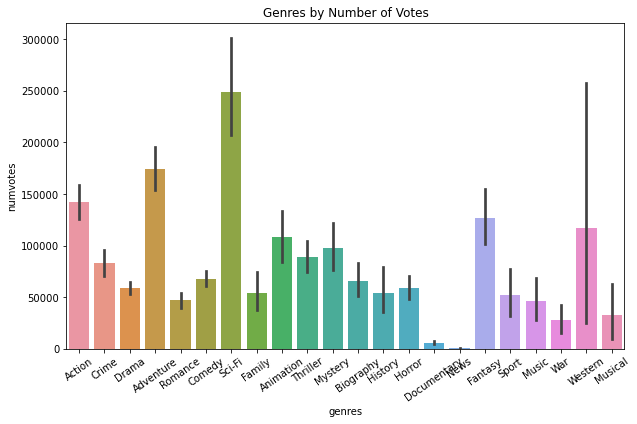

In [1043]:
movie_df.groupby('genres')['numvotes'].mean().sort_values(ascending = False)
plt.figure(figsize=(10,6))
sns.barplot(x='genres', y= "numvotes", data=movie_df)
plt.xticks(rotation=35)
plt.title('Genres by Number of Votes')
plt.show()

Science Fiction has the higest number of votes in our dataset

# Doese Runtime affects Rating?

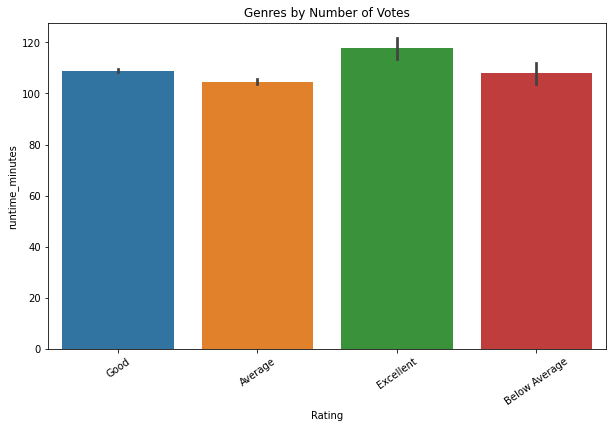

In [1047]:
movie_df.groupby('Rating')['runtime_minutes'].mean().sort_values(ascending = False)
plt.figure(figsize=(10,6))
sns.barplot(x='Rating', y= "runtime_minutes", data=movie_df)
plt.xticks(rotation=35)
plt.title('Rating by Runtime')
plt.show()

# Conclusion

In conclusion, I would recommend that Microsoft release one of the following 3 movies:

    1. Animation films because it the most profitable in average.
    
    2. Science Fiction films being the most popular genre and it is the second most profitable genre.
    
    3. Drama films have a positive correlation with most variables like revenue, ratings and number of votes making it,
       a good genre to invest in.

# Next Steps
Since i have used exploratory data analysis, I would like to work with a larger data set. This will allow use to utilized descriptive statistics as well as visualizations to see trends in the data and isolate key factors for making a successful movie, this will allow us to analyze trends in the movie industry and common attributes such as the best directors to work with and the budget required to create a movie that will do well . 